In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

ModuleNotFoundError: No module named 'numpy'

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
train=pd.read_csv('/content/drive/MyDrive/Data/Train_data.csv')

In [253]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [254]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [255]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
train.describe(include='object')


,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [257]:
train.shape

(25192, 42)

In [258]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [259]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


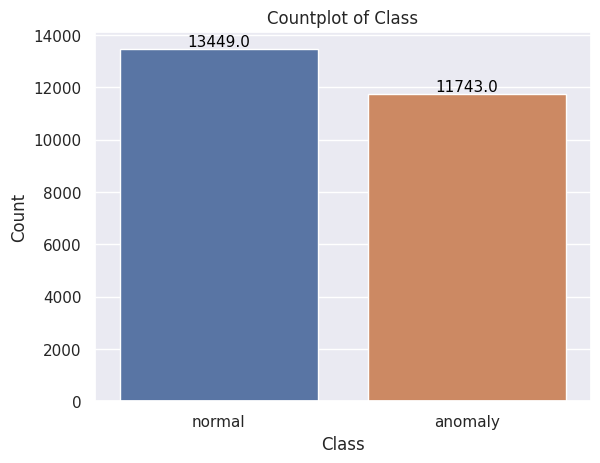

In [260]:
# Create the countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=train)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Countplot of Class")

# Show the plot
plt.show()

In [261]:
print('Class distribution Training set:')
print(train['class'].value_counts())
#As we can see the dataset is not that much imbalanced

Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [262]:
#Now as our dataset contains categorical values, we will convert them to numerical values using label encoding
def le(train):
    for col in train.columns:
        if train[col].dtype == 'object':
                label_encoder = LabelEncoder()
                train[col] = label_encoder.fit_transform(train[col])

le(train)

In [263]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [264]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [265]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [266]:
X_train = train.drop(['class'], axis=1)# Features for training
y_train = train['class']#Target variable for training

In [267]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [268]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [269]:
# Standardize the features using MinMaxScaler
scaler = MinMaxScaler()  # Use MinMaxScaler for scaling
X_train_scaled = scaler.fit_transform(X_train)

In [270]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Select the top-k features using RFE
k = 30 # Adjust the number of features to select
selector = RFE(estimator=clf, n_features_to_select=k)
X_train_rfe = selector.fit_transform(X_train_scaled,y_train)


In [271]:
# Get a Boolean mask of selected features
selected_features_mask = selector.support_

# Print the indices or column names of the selected features
selected_feature_indices = [i for i, selected in enumerate(selected_features_mask) if selected]
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [0, 1, 2, 3, 4, 5, 7, 9, 11, 12, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Selected feature names: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [272]:
from sklearn.decomposition import PCA
# Apply PCA for feature selection with 20 components
n_components = 20  # Number of components to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the selected features based on PCA
selected_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :n_components]
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Feature Names:")
for i in range(n_components):
    print(f"Component {i + 1}: {selected_feature_names[i].tolist()}")


Selected Feature Names:
Component 1: ['dst_host_srv_serror_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_count', 'count', 'service', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'land', 'is_host_login', 'urgent', 'src_bytes', 'num_file_creations', 'num_failed_logins', 'num_compromised']
Component 2: ['srv_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'count', 'service', 'dst_host_count', 'duration', 'dst_host_srv_diff_host_rate', 'wrong_fragment', 'protocol_type', 'num_failed_logins', 'src_bytes', 'urgent', 'is_host_login', 'num_root', 'num_compromised']
Component 3: ['dst_host_same_src_port_rate', 'srv_diff_host_rate', 'same_srv_rate', 'dst_host_srv_diff_host_rate', 'flag', 'dst_host_diff_srv_rate', 'srv_count', 'duration', 'wrong_fragment', 'dst_bytes', 'land', 'num

<ipython-input-272-0045e6350d7b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_feature_names = X_train.columns[selected_feature_indices]


In [273]:
# Split the data into training and testing sets
X_train_small, X_val, y_train_small, y_val= train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

In [274]:
X_train_small

array([[-9.26998551e-01, -7.89946790e-02,  1.40567138e+00, ...,
         3.13652089e-02,  7.45308275e-02, -1.35438591e-03],
       [ 1.68648199e+00, -4.28914622e-01, -5.06832882e-02, ...,
         1.12248982e-02,  6.00542828e-03,  4.13575792e-03],
       [ 1.36627090e-02,  3.55083340e-01,  1.01278068e+00, ...,
        -4.99658542e-02, -8.38267701e-02,  2.57259777e-02],
       ...,
       [ 4.67327099e-01,  2.09220657e+00, -4.08320736e-01, ...,
        -2.53043729e-02, -9.56737976e-04, -9.75745394e-03],
       [-1.19304156e+00, -4.16042360e-01, -1.43178123e-01, ...,
         1.36159187e-02, -1.23624885e-02,  3.76607548e-03],
       [ 1.79909535e+00, -3.76568872e-01, -4.18749684e-02, ...,
        -6.04550633e-03, -9.65776296e-03, -1.08270154e-02]])

In [275]:
# Create and train the logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_small, y_train_small)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_val)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)

# Print the evaluation metrics
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)

Accuracy: 0.9555467354633856
Precision: 0.9520295202952029
Recall: 0.9648466716529543
F1-Score: 0.9583952451708767


In [276]:
# Create and train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_small, y_train_small)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_val)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val ,y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

# Print the evaluation metrics
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

Accuracy: 0.9871006152014289
Precision: 0.9894934333958724
Recall: 0.9861630516080778
F1-Score: 0.9878254354748081


In [277]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create and fit the LDA model
model_lda = LinearDiscriminantAnalysis()
model_lda.fit_transform(X_train_small, y_train_small)
y_pred_lda = model_lda.predict(X_val)
# Evaluate the model's performance
accuracy_lda = accuracy_score(y_val, y_pred_lda)
precision_lda = precision_score(y_val, y_pred_lda)
recall_lda = recall_score(y_val ,y_pred_lda)
f1_lda = f1_score(y_val, y_pred_lda)

# Print the evaluation metrics
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("F1-Score:", f1_lda)

Accuracy: 0.9537606667989681
Precision: 0.9502028771670971
Recall: 0.9633507853403142
F1-Score: 0.9567316620241412


In [278]:
# Create and train the Perceptron model
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_small, y_train_small)

# Make predictions on the test set
y_pred_perceptron = perceptron.predict(X_val)

# Calculate accuracy
accuracy_p = accuracy_score(y_val, y_pred_perceptron)
print("Accuracy:", accuracy_p)

# Calculate precision
precision_p= precision_score(y_val, y_pred_perceptron)
print("Precision:", precision_p)

# Calculate recall
recall_p = recall_score(y_val, y_pred_perceptron)
print("Recall:", recall_p)

# Calculate F1-score
f1_p = f1_score(y_val, y_pred_perceptron)
print("F1-Score:", f1_p)


Accuracy: 0.925977376463584
Precision: 0.9467961165048544
Recall: 0.9117427075542259
F1-Score: 0.92893884549438


In [279]:
# Define the weak learners
from sklearn.ensemble import BaggingClassifier
weak_learners = [
    ('logistic_regression', LogisticRegression()),
    ('lda', LinearDiscriminantAnalysis()),
    ('perceptron', Perceptron()),
    ('decision_tree', DecisionTreeClassifier())
]

# Create the BaggingClassifier with a Decision Tree as the meta-learner
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100,  # Number of base estimators
                            random_state=42)

# Fit the BaggingClassifier on the training data
bagging.fit(X_train_small, y_train_small)

# Make predictions using the ensemble model
y_pred_bagging = bagging.predict(X_val)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print("Accuracy:", accuracy_bagging)
# Calculate precision
precision_bagging = precision_score(y_val, y_pred_bagging)
print("Precision:", precision_bagging)

# Calculate recall
recall_bagging = recall_score(y_val, y_pred_bagging)
print("Recall:", recall_bagging)

# Calculate F1-score
f1_bagging = f1_score(y_val, y_pred_bagging)
print("F1-Score:", f1_bagging)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9914665608255606
Precision: 0.9895794566430964
Recall: 0.9943904263275991
F1-Score: 0.9919791083753031


In [280]:
#Making a table of the results
data = {
    "Classifiers": ["Logistic Regression", "LDA", "Decision Tree", "Preceptron","Bagging Classifier"],
    "Precision": [precision_lr,precision_lda, precision_dt,precision_p,precision_bagging],
    "Recall":[recall_lr,recall_lda,recall_dt,recall_p,recall_bagging],
    "F1_score":[f1_lr,f1_lda,f1_dt,f1_p,f1_bagging],
    "Accuracy": [accuracy_lr,accuracy_lda,accuracy_dt,accuracy_p,accuracy_bagging]
    }

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

           Classifiers  Precision    Recall  F1_score  Accuracy
0  Logistic Regression   0.952030  0.964847  0.958395  0.955547
1                  LDA   0.950203  0.963351  0.956732  0.953761
2        Decision Tree   0.989493  0.986163  0.987825  0.987101
3           Preceptron   0.946796  0.911743  0.928939  0.925977
4   Bagging Classifier   0.989579  0.994390  0.991979  0.991467


In [281]:
#Build Confusion Matrix
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
confusion = confusion_matrix(y_val, y_pred_bagging)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[2337   28]
 [  15 2659]]


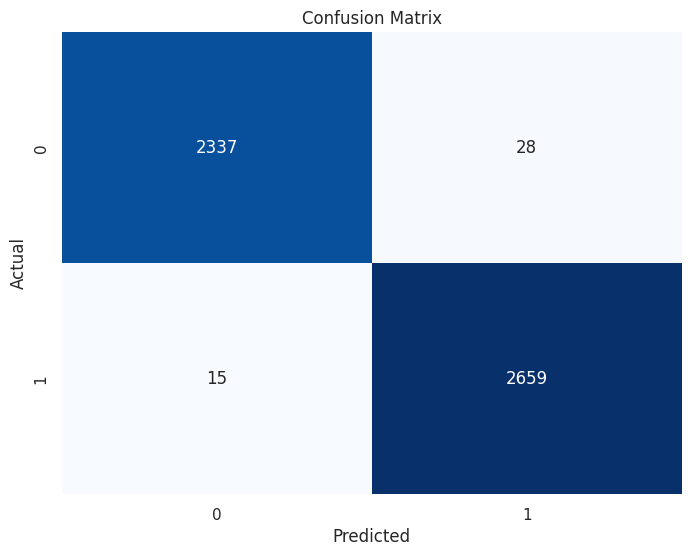

In [282]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [283]:
# Save the trained model to a file
import joblib
joblib.dump(bagging, 'bagging.pkl')

['bagging.pkl']

In [284]:
#As our  model is ready to predict. We will apply it on the Tet_data csv file which does not contain class label
test_data=pd.read_csv('/content/drive/MyDrive/Data/Test_data.csv')

In [285]:
test_data = test_data.drop('num_outbound_cmds', axis=1)

In [286]:
#Now as Test dataset contains categorical values, we will convert them to numerical values using label encoding
def le(test):
    for col in test.columns:
        if test[col].dtype == 'object':
                label_encoder = LabelEncoder()
                test[col] = label_encoder.fit_transform(test[col])
le(test_data)

In [287]:
# Separate the features from the test dataset
X_test = test_data  # Assuming the test_data file contains only features

# Apply PCA to reduce the number of features to 20
pca = PCA(n_components=20)
X_test_pca = pca.fit_transform(X_test)

In [288]:
import joblib
bagging = joblib.load('bagging.pkl')

In [289]:
# Make predictions using the trained stacking classifier
y_test_pred = bagging.predict(X_test_pca)



In [290]:
# Inverse transform the label encoding for the predictions (if needed)
y_test_pred = label_encoder.inverse_transform(y_test_pred)

In [291]:
# Create a DataFrame with the predictions
test_predictions = pd.DataFrame({'class':y_test_pred})

In [292]:
test_predictions

,class
0,0
1,1
2,0
3,1
4,0
...,...
22539,1
22540,0
22541,0
22542,1
